Predictions: [0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 2.0, 2.0]
accuracy: 0.9333333333333333


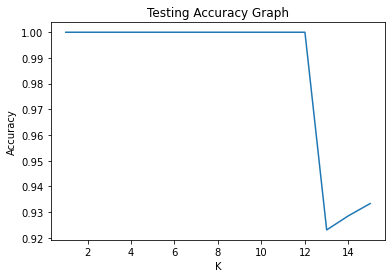

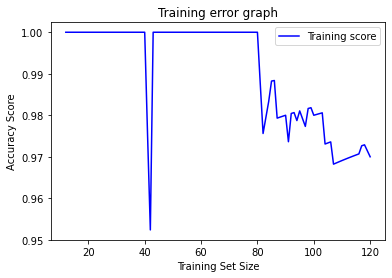

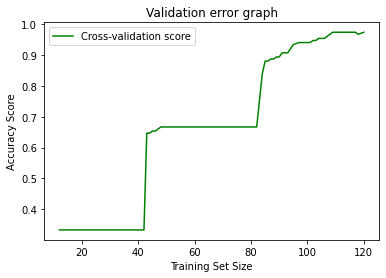

In [24]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import learning_curve


iris = datasets.load_iris()

X = iris.data  # input
y = iris.target  # output

dataset = pd.DataFrame(X, columns=iris.feature_names)
dataset = pd.concat([dataset, pd.Series(y)], axis=1)

dataset.rename(columns={0: 'class'}, inplace=True)

X_train, X_test = train_test_split(dataset, test_size=0.1)  # spliting dataset

X_train = pd.DataFrame(X_train).astype(float).values.tolist()
X_test = X_test.astype(float).values.tolist()


# euclidean distance to find the distance between two points. d(p, q) = sqrt((p1-q1)**2)
def euclidean_distance(p1, q1):
    p1, q1 = np.array(p1), np.array(q1)
    distance = 0
    for i in range(len(p1)-1):
        distance += (p1[i] - q1[i]) ** 2  # adding into distance
    return np.sqrt(distance)


def knn(X_train, pred, k=1):
    distances = []
    k_neighbors = []  # storing neighbors
    count_resposes = {}

    for i in range(len(X_train)):
        eucl_dist = euclidean_distance(X_train[i][:-1], pred) # getting distance to append in distances
        distances.append((X_train[i], eucl_dist))

    distances.sort(key=lambda x: x[1]) # sorting by distance

    for i in range(k):
        k_neighbors.append(distances[i][0])  # appending k nearest neighbors that have smallest distance 

    for i in range(len(k_neighbors)):
        response = k_neighbors[i][-1]  # target 
        
        if response in count_resposes: # if exist in count_response then increment by 1
            count_resposes[response] += 1
        else: # if not exist in count_response then set to 1
            count_resposes[response] = 1

    count_resposes_sorted = sorted(count_resposes.items(), key=lambda x: x[1], reverse=True) # sorting in desceing order by value

    # 1st one has mejority thats why returning that
    return count_resposes_sorted[0][0]


predictions = []
y_test = []

for row in X_test:
    pred = row[:-1]
    prediction = knn(X_train, pred, 6)
    predictions.append(prediction)
    y_test.append(row[4])

score = accuracy_score(y_test, predictions)
print('Predictions:', predictions)
print('accuracy:', score)


########################################## Accuracy, Training and Validation graphs ######################################
# accuracy graph
predictions2 = []
y_test2 = []
k = 1
accuracy = []
for row in X_test:
    pred = row[:-1]
    prediction = knn(X_train, pred, k)
    predictions2.append(prediction)
    y_test2.append(row[4])
    score = accuracy_score(y_test2, predictions2)
    accuracy.append(score)
    k = k + 1

plt.plot(range(1, 16), accuracy)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Testing Accuracy Graph')
plt.show()


sizes, training_scores, testing_scores = learning_curve(KNeighborsClassifier(
), X, y, cv=None, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 100))

# for training error graph

# Mean and Standard Deviation of training scores
m_training = np.mean(training_scores, axis=1)
SD_training = np.std(training_scores, axis=1)
plt.plot(sizes, m_training, color="b", label="Training score")

plt.title("Training error graph")
plt.xlabel("Training Set Size"), plt.ylabel(
    "Accuracy Score"), plt.legend(loc="best")
plt.show()


# for validation error graph
# Mean and Standard Deviation of testing scores
m_testing = np.mean(testing_scores, axis=1)
SD_testing = np.std(testing_scores, axis=1)
plt.plot(sizes, m_testing, color="g", label="Cross-validation score")

plt.title("Validation error graph")
plt.xlabel("Training Set Size"), plt.ylabel(
    "Accuracy Score"), plt.legend(loc="best")
plt.show()
